# Yahil Self-Similar Stellar Collapse

Ref1: Yahil, A. (1983). Self-similar stellar collapse. The Astrophysical Journal, 265, 1047. https://doi.org/10.1086/160746

Ref2: Guidry, M. (2019). Stars and Stellar Processes. Cambridge University Press.


- A polytropic process is defined by

$$ \frac{\delta Q}{\delta T}=c $$

where $Q$ is the heat, $T$ is the temperature, and $c$ is a constant.

For ideal gases,

$$ p = \frac{N}{V}k_{b} T$$

where $p$ is pressure, $k_{B}$ is the Boltzmann constant, $V$ is the volume, and $N$ is the number of the weak-interacted particles.

The first law of thermodynamics gives

$$d U= \delta Q - \delta W =\delta Q-P d V=T d S-P d V$$

One can prove that polytropic processes in ideal gases obey

$$
\frac{d T}{T}=(1-\gamma) \frac{d V}{V}
$$

where 

$$
\gamma \equiv \frac{C_{P}-c}{C_{V}-c}
$$

- The most common form of a polytropic equation of state for ideal gas in astrophysics is

$$ p = \kappa \rho^{\gamma}$$

where $\rho$ is the density, $\gamma$ is an effective adiabatic index, $\kappa$ is a constant in both space and time, and

$$ 6/5 \leq \gamma \leq 4/3 $$.

For a completely degenerate gas of nonrelativistic fermions, $\gamma = \frac{5}{3}$; for a completely degenerate gas of ultrarelativistic fermions, $\gamma = \frac{4}{3}$.


- Dimensionless parameters

$$ X=\kappa^{-1 / 2} G^{(\gamma-1) / 2} r(-t)^{\gamma-2} $$

where $G$ is the gravitational constant, the origin of time $t$ is chosen to be the moment when the central density becomes infinite. 

In [1]:
%matplotlib inline
import numpy as np
import rclib.IO as rcIO 

second      = 1.
centimeter  = 1.
gram        = 1.
erg         = 1.

millisecond = 1.0e-3 * second
meter       = 1e2 * centimeter
kilometer   = 1e3 * meter

Gravitational_constant = 6.673e-8                   # CGS
light_speed            = 3e10 * centimeter / second # [cm s-1]

gamma       = 1.3 
profilename = 'Yahil_Gam130.dat'

collapse_time     = 150 * millisecond
central_density   = 7.0e9*gram/(centimeter**3) # [g cm^-3]
central_pressure  = 6.0e27*erg/(centimeter**3)# [erg cm^-3]
core_radius_order = 4.98 # 10^order in [km]
number_element    = 128

kappa = central_pressure / pow( central_density, gamma )
radius = np.logspace(-1, core_radius_order, num=number_element) * kilometer # km

print('kappa =', kappa)

[X1D, D1D, V1D, M1D] = rcIO.IO_YahilProfile(profilename)

dimensionless_X = pow(kappa,-1/2) * pow(Gravitational_constant,(gamma-1)/2) \
    * radius * pow(collapse_time,gamma-2)

D_interp = np.interp(dimensionless_X, X1D, D1D)
V_interp = np.interp(dimensionless_X, X1D, V1D)
M_interp = np.interp(dimensionless_X, X1D, M1D)

print('dimensionless_X(0)', dimensionless_X[0])
print('dimensionless_X(end)', dimensionless_X[len(dimensionless_X)-1])

kappa = 953946015514834.6
Using YahilProfile/Yahil_Gam130.dat
dimensionless_X(0) 0.00010247605266273233
dimensionless_X(end) 97.8638705376517


/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:28: MatplotlibDeprecationWarning: Adding an a

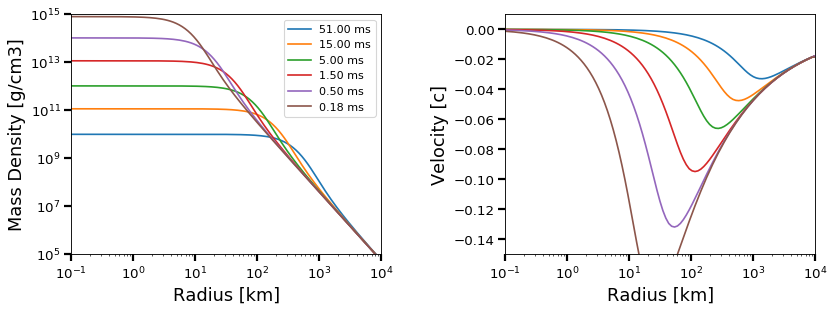

In [12]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2, figsize=(12, 6), dpi= 80, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 2.5, wspace= 0.4) # (hspace = .5, wspace=.001)

axs = axs.ravel()

test_time = [51. * millisecond, 15. * millisecond, 5. * millisecond, \
             1.5 * millisecond, 0.5* millisecond, 0.18* millisecond]
    
for mt in test_time:
    dimensionless_X = pow(kappa,-1/2) * pow(Gravitational_constant,(gamma-1)/2) \
    * radius * pow(mt,gamma-2)
    D_interp = np.interp(dimensionless_X, X1D, D1D)
    V_interp = np.interp(dimensionless_X, X1D, V1D)
    M_interp = np.interp(dimensionless_X, X1D, M1D)

    D = pow(Gravitational_constant,-1) * pow(mt,-2) * D_interp
    V = pow(kappa,1/2) * pow(Gravitational_constant,(1-gamma)/2) \
    * pow(mt,1-gamma) * V_interp
    
    ax1 = plt.subplot(121)
    plt.loglog(radius/kilometer, D,label='%.2f'%(mt*1e3)+' ms')
    
    ax2 = plt.subplot(122)
    plt.semilogx(radius/kilometer,V/light_speed)

    
ax1 = plt.subplot(121)
plt.legend(loc='best')
plt.xlim((1e-1, 1e4))
plt.ylim((1e5, 1e15))
plt.xlabel('Radius [km]',fontsize=16)
plt.ylabel('Mass Density [g/cm3]',fontsize=16)
ax1.tick_params(direction='out', length=6, width=2, colors='k',
                grid_color='k', grid_alpha=0.5,labelsize = 12)
    
ax2 = plt.subplot(122)
plt.xlim((1e-1, 1e4))
plt.ylim((-0.15, 0.01))
plt.xlabel('Radius [km]',fontsize=16)
plt.ylabel('Velocity [c]',fontsize=16)
ax2.tick_params(direction='out', length=6, width=2, colors='k',
                grid_color='k', grid_alpha=0.5,labelsize = 12)


plt.subplots_adjust(bottom=0.25, top=0.75)
plt.show()